## Importing Libraries

In [1]:
# Check if Tensorflow can use GPU
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
tf.version.VERSION

'2.2.0'

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

## Cloning Dataset Repo

In [4]:
# !git clone 'https://github.com/education454/datasets.git'

In [5]:
import os
base_dir  = 'datasets/Data'
train_dir = os.path.join(base_dir,'train')
test_dir  = os.path.join(base_dir,'test')
train_covid_dir  = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir   = os.path.join(test_dir,'COVID19')
test_normal_dir  = os.path.join(test_dir,'NORMAL')

In [6]:
train_covid_names  = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)
test_covid_names   = os.listdir(test_covid_dir)
test_normal_names  = os.listdir(test_normal_dir)

In [7]:
test_normal_names[:5]

['.ipynb_checkpoints',
 'NORMAL(10).jpg',
 'NORMAL(1001).jpg',
 'NORMAL(1003).jpg',
 'NORMAL(1004).jpg']

## Data Visualisation

In [8]:
# PLotting a grid of 16 images( 8 COVID and 8 Normal )

import matplotlib.image as mpimg

# No. of Cols and Rows
nrows = 4
ncols = 4

#Set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#Get the filenames from the covid & normal dir of the train dataset
next_covid_pic  = [  os.path.join(train_covid_dir,fname) for fname in train_covid_names[:8]  ]
next_normal_pic = [ os.path.join(train_normal_dir,fname) for fname in train_normal_names[:8] ]

# Print the list
print(next_covid_pic)
print(next_normal_pic)

['datasets/Data/train/COVID19/COVID-19 (1).jpeg', 'datasets/Data/train/COVID19/COVID-19 (1).png', 'datasets/Data/train/COVID19/COVID-19 (10).jpeg', 'datasets/Data/train/COVID19/COVID-19 (101).jpg', 'datasets/Data/train/COVID19/COVID-19 (107).jpg', 'datasets/Data/train/COVID19/COVID-19 (11).jpeg', 'datasets/Data/train/COVID19/COVID-19 (11).jpg', 'datasets/Data/train/COVID19/COVID-19 (12).jpeg']
['datasets/Data/train/NORMAL/NORMAL(0).jpg', 'datasets/Data/train/NORMAL/NORMAL(1).jpg', 'datasets/Data/train/NORMAL/NORMAL(100).jpg', 'datasets/Data/train/NORMAL/NORMAL(1000).jpg', 'datasets/Data/train/NORMAL/NORMAL(1002).jpg', 'datasets/Data/train/NORMAL/NORMAL(1005).jpg', 'datasets/Data/train/NORMAL/NORMAL(1006).jpg', 'datasets/Data/train/NORMAL/NORMAL(1007).jpg']


<Figure size 864x864 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

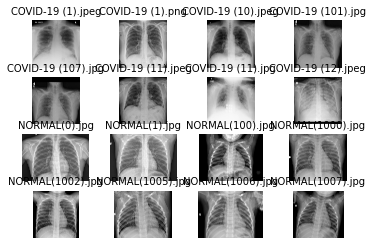

In [9]:
for i,img_path in enumerate(next_covid_pic+next_normal_pic):
    img_name = img_path.split('/')[-1]
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    sp.set_title(img_name, fontsize=10)
    plt.imshow(img, cmap='gray')

plt.show

## Generating Augmented Images for Training, Validation and Testing

In [10]:
# Training images generator
train_datagen = ImageDataGenerator(rescale=1./255,\
    validation_split=0.2,\
        zoom_range=0.2,\
            horizontal_flip= True)

# Validation images generator
validation_datagen = ImageDataGenerator(rescale=1./255)

# Testing images generator
testing_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( train_dir,\
    target_size = (150,150),\
        subset = 'training',\
            batch_size = 32,\
                class_mode = 'binary' )

validation_generator = train_datagen.flow_from_directory( train_dir,\
     target_size = (150,150),\
          subset = 'validation',\
               batch_size = 32,\
                    class_mode = 'binary' )

test_generator = testing_datagen.flow_from_directory( test_dir,\
    target_size = (150,150),\
        batch_size = 32,\
            class_mode = 'binary')


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 492 images belonging to 2 classes.


In [11]:
test_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [12]:
train_generator.image_shape

(150, 150, 3)

## Build CNN Model

In [13]:
model = Sequential()

# add the convolution layer
# filters, size of filters, padding, activation_function, input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# dropout layer
model.add(Dropout(0.5))

# Another convolution layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# dropout layer
model.add(Dropout(0.5))

# Flatten image
model.add(Flatten())

# Dense Layer
model.add(Dense(256, activation='relu'))

# dropout layer
model.add(Dropout(0.5))

# Output layer

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

## Compiling and Training the model

In [14]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam( lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=46,
                    validation_data=validation_generator,
                    validation_steps=10)

Epoch 1/10
46/46 [==============================] - 70s 2s/step - loss: 1.3784 - accuracy: 0.7157 - val_loss: 0.3773 - val_accuracy: 0.7969
Epoch 2/10
46/46 [==============================] - 71s 2s/step - loss: 0.3287 - accuracy: 0.8613 - val_loss: 0.3089 - val_accuracy: 0.8826
Epoch 3/10
46/46 [==============================] - 70s 2s/step - loss: 0.2598 - accuracy: 0.9055 - val_loss: 0.3048 - val_accuracy: 0.8658
Epoch 4/10
46/46 [==============================] - 70s 2s/step - loss: 0.2224 - accuracy: 0.9172 - val_loss: 0.2039 - val_accuracy: 0.9295
Epoch 5/10
46/46 [==============================] - 72s 2s/step - loss: 0.1874 - accuracy: 0.9344 - val_loss: 0.1999 - val_accuracy: 0.9128
Epoch 6/10
46/46 [==============================] - 68s 1s/step - loss: 0.1496 - accuracy: 0.9517 - val_loss: 0.1467 - val_accuracy: 0.9430
Epoch 7/10
46/46 [==============================] - 70s 2s/step - loss: 0.1268 - accuracy: 0.9565 - val_loss: 0.1353 - val_accuracy: 0.9597
Epoch 8/10
46/46 [==

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epoch')

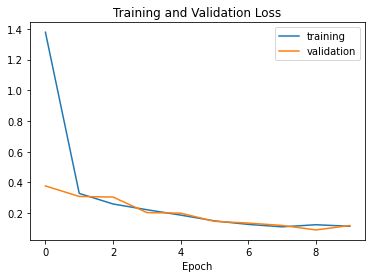

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['training','validation'])
plt.title('Training and Validation Loss')

plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

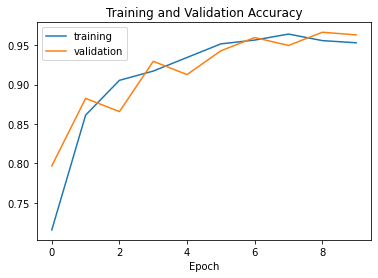

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy')

plt.xlabel('Epoch')

## Evaluatiing on Test Set

In [19]:
test_loss, test_acc = model.evaluate(test_generator, steps=16)

16/16 [==============================] - 16s 1s/step - loss: 0.1372 - accuracy: 0.9411


In [20]:
print('Test Loss: %.3f, Test Accuracy: %.3f'%(test_loss, test_acc))

Test Loss: 0.137, Test Accuracy: 0.941


## Testing on external data

In [21]:
c_path = 'datasets/Data/test/COVID19/COVID19(197).jpg'
n_path = 'datasets/Data/test/NORMAL/NORMAL(818).jpg'

files = [c_path,n_path]

In [23]:
import numpy as np
from keras.preprocessing import image

for file_path in files:
    print(file_path)
    img = image.load_img(file_path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classs = model.predict(images, batch_size=10 )
    print(file_path.split('/')[-1])
    print( ('COVID19' if classs==0 else 'Normal')+'\n' )

datasets/Data/test/COVID19/COVID19(197).jpg
COVID19(197).jpg
COVID19

datasets/Data/test/NORMAL/NORMAL(818).jpg
NORMAL(818).jpg
Normal

